<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 1: World Development Statistics

--- 
# Part 1

Part 1 requires knowledge of basic Python.

---

## Problem Statement

Researchers are investiagting the orgins of skin cancer and they have to track when the ozone layer started to deteriorate. Carbon dioxide emissions are known to be harmful to the earth's atmoshphere and usually spoken of reagrding climate change, life expectancy and population flucatations. The objective of this project are to find out which countries were the highest emitters of cabon dioxide at the earliest stages when carbon emissions came about. According to Gapminder's data, the earliest records of carbon dioxide emissions is 1800. 

### Contents:
- [Background](#Background)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-Data)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Background

For our first project, we're going to take a look at World Development Statistics from [Gapminder](https://www.gapminder.org/about/), an independent Swedish foundation that aims to make data about the world more accessible and reliable. A good introduction on Gapminder is this [Ted Talk](https://www.ted.com/talks/hans_rosling_the_best_stats_you_ve_ever_seen) from Hans Rosling, which also shows how effective data visualization can be for your audience.

### Choose your Data

There are 3 datasets included in the [`data`](./data/) folder for this project. You are required to pick **at least two** of these to complete your analysis. Feel free to use more than two if you would like, or add other relevant datasets you find online. 

**HINT: There are more datasets available on the Gapminder website**

* [`population.csv`](./data/population.csv): Population by Country
* [`life_expectancy.csv`](./data/life_expectancy.csv): Life Expectancy by Country
* [`gni_per_cap_atlas_method_con2021.csv`](./data/gni_per_cap_atlas_method_con2021.csv): Gross National Income (GNI) per capita in current US dollars

I will be using population.csv, life expectancy.csv, and I will pull the dataset co2_pcap_cons.csv collected from Gapminder. 

### Outside Research

Based on your problem statement and your chosen datasets, spend some time doing outside research on state policies or additional information that might be relevant. Summarize your findings below. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. **Make sure that you cite your sources.**

I will be using google to search for more information to create a sound soluton to the problem.

### Coding Challenges

1. Manually calculate mean:

    Write a function that takes in values and returns the mean of the values. Create a list of numbers that you test on your function to check to make sure your function works!
    
    *Note*: Do not use any mean methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

### Mean Function

In [1]:
def mean_values(input_values):
    return (sum(input_values)) / (len(input_values))

In [2]:
v = [5, 9, 11, 15, 1, 32, 22, 7, 17]
mean_values(v)

13.222222222222221

2. Manually calculate standard deviation:

    The formula for standard deviation is below:

    $$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

    Where $x_i$ represents each value in the dataset, $\mu$ represents the mean of all values in the dataset and $n$ represents the number of values in the dataset.

    Write a function that takes in values and returns the standard deviation of the values using the formula above. Hint: use the function you wrote above to calculate the mean! Use the list of numbers you created above to test on your function.
    
    *Note*: Do not use any standard deviation methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

### Standard Deviation Function

In [3]:
def stan_dev(input_values):
    mean = mean_values(input_values)
    var = (sum((i - mean) ** 2 for i in input_values)) / len(input_values)
    stan_dev = var**0.5
    return stan_dev
#lesson 104,201

In [4]:
stan_dev(v)

8.978712822594188

3. Data cleaning function:
    
    Write a function that takes in a string consisting a number and an abbreviated place value (ex. '5M', '45K'), and converts that string to an integer. For example, inputting '5M' in your function should return 5000000, '45K' should return 45000, etc. Make sure to test your function to make sure it works!

You will use these functions later on in the project!

### Abbreviate to Intefer Converter Function

In [5]:
def int_convert(abbrev):
    multiplier = {'k': 1000, 'M': 1000000, 'B': 1000000000}
    abbrev = str(abbrev)
    if abbrev.replace(".", "").isdigit():
        return float(abbrev)
    else:  
        # if [num_str].replace(".","").isdigit():
        num_str, abbrev_num = abbrev[:-1], abbrev[-1]

        if abbrev_num in multiplier:
            # inside to out math PEMDAS, abbrev, knock off last unit of number (k,M,B), replace any '.' with a ' '
            # muiltiply by the multiplier and turn to float
            num_int = float(abbrev[:-1].replace('.','')) * (multiplier[abbrev[-1]])
            return num_int
# Help from ChatGPT,Rowan, Nolan, and Katie

In [6]:
int_convert('6M')

6000000.0

In [7]:
# keep the country name column when using convert function
def df_cleaner(df, col):
    df[col].head
    fixed_cols = df[col].applymap(int_convert)
    fixed_cols.head()
    df[col]  = fixed_cols
    return df
#Help from Nolan,ChatGPT,lesson 108

--- 
# Part 2

Part 2 requires knowledge of Pandas, EDA, data cleaning, and data visualization.

---

*All libraries used should be added here*

In [8]:
# Imports:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Import and Cleaning

Import the datasets that you selected for this project and go through the following steps at a minimum. You are welcome to do further cleaning as you feel necessary:
1. Display the data: print the first 5 rows of each dataframe to your Jupyter notebook.
2. Check for missing values.
3. Check for any obvious issues with the observations (keep in mind reasonable values for each column).
4. Fix any errors you identified in steps 2-3.
5. Display the data types of each feature.
6. Fix any incorrect data types found in step 5.
    - Fix any individual values preventing other columns from being the appropriate type.
    - If your dataset has a column of abbreviated numbers (ex. '3M', '45K', etc.), use the function you wrote in Part 1 (coding challenges, number 3) to convert this to integers! *Hint*: use `.map()` or `.apply()`.
7. Rename Columns.
    - Column names should be all lowercase.
    - Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`).
    - Column names should be unique and informative.
8. Drop unnecessary rows (if needed).
9. Merge dataframes that can be merged.
10. Perform any additional cleaning that you feel is necessary.
11. Save your cleaned and merged dataframes as csv files.

### 1) Dataframe Heads

In [9]:
emissions = pd.read_csv('../data/co2_pcap_cons.csv')
emissions.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Albania,0.011,0.011,0.011,0.011,0.011,0.011,0.011,0.011,0.011,...,2.45,2.37,2.27,2.25,2.04,2.01,2.13,2.08,2.05,2.00
1,UAE,0.137,0.137,0.137,0.137,0.137,0.137,0.137,0.137,0.137,...,25.4,26.2,27,26.80,27.00,26.70,23.90,23.5,21.20,19.70
2,Argentina,0.296,0.296,0.296,0.296,0.296,0.296,0.296,0.296,0.296,...,4.56,4.5,4.66,4.30,4.60,4.27,4.31,3.95,3.72,3.52
3,Armenia,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,...,1.79,2.23,2.07,2.00,2.03,1.92,2.02,2.49,2.45,2.57
4,Australia,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,17.5,17.6,16.4,16.20,16.00,15.30,15.30,14.6,14.20,13.70


In [10]:
life_expect = pd.read_csv('../data/life_expectancy.csv')
life_expect.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,28.2,28.2,28.2,28.2,28.2,28.2,28.1,28.1,28.1,...,75.5,75.7,75.8,76.0,76.1,76.2,76.4,76.5,76.6,76.8
1,Angola,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,...,78.8,79.0,79.1,79.2,79.3,79.5,79.6,79.7,79.9,80.0
2,Albania,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,...,87.4,87.5,87.6,87.7,87.8,87.9,88.0,88.2,88.3,88.4
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,United Arab Emirates,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,...,82.4,82.5,82.6,82.7,82.8,82.9,83.0,83.1,83.2,83.3


In [11]:
pop = pd.read_csv('../data/population.csv')
pop.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,...,108M,108M,109M,109M,109M,110M,110M,110M,111M,111M
1,Angola,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,...,125M,126M,127M,128M,129M,130M,131M,131M,132M,133M
2,Albania,400k,402k,404k,405k,407k,409k,411k,413k,414k,...,1.35M,1.32M,1.29M,1.26M,1.23M,1.21M,1.18M,1.15M,1.12M,1.1M
3,Andorra,2650,2650,2650,2650,2650,2650,2650,2650,2650,...,62.5k,62.2k,61.9k,61.7k,61.4k,61.2k,60.9k,60.7k,60.5k,60.2k
4,United Arab Emirates,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,...,13.5M,13.5M,13.6M,13.7M,13.8M,13.8M,13.9M,14M,14M,14.1M


### 2) Check for missing values

In [12]:
emissions.isna().sum()

country    0
1800       0
1801       0
1802       0
1803       0
          ..
2016       0
2017       0
2018       0
2019       0
2020       0
Length: 222, dtype: int64

In [13]:
life_expect.isna().sum()

country    0
1800       9
1801       9
1802       9
1803       9
          ..
2096       9
2097       9
2098       9
2099       9
2100       9
Length: 302, dtype: int64

In [14]:
pop.isna().sum()

country    0
1800       0
1801       0
1802       0
1803       0
          ..
2096       1
2097       1
2098       1
2099       1
2100       1
Length: 302, dtype: int64

In [15]:
# 3,4) fix missing errors
# Some missing data NaN, and 0, will drop in later step

### 5) Display each data type

In [16]:
emissions.dtypes

country     object
1800       float64
1801       float64
1802       float64
1803       float64
            ...   
2016       float64
2017       float64
2018        object
2019       float64
2020       float64
Length: 222, dtype: object

In [17]:
life_expect.dtypes

country     object
1800       float64
1801       float64
1802       float64
1803       float64
            ...   
2096       float64
2097       float64
2098       float64
2099       float64
2100       float64
Length: 302, dtype: object

In [18]:
pop.dtypes
#will change after int_convert applied

country    object
1800       object
1801       object
1802       object
1803       object
            ...  
2096       object
2097       object
2098       object
2099       object
2100       object
Length: 302, dtype: object

### 6) Fix incorrect data types

In [19]:
#apply the cleaner function with the convert function inside
pop_clean = df_cleaner(pop,pop.columns[1:])
pop_clean.head()
# Help from Rowan

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,328000000.0,328000000.0,328000000.0,328000000.0,328000000.0,328000000.0,328000000.0,328000000.0,328000000.0,...,108000000.0,108000000.0,109000000.0,109000000.0,109000000.0,110000000.0,110000000.0,110000000.0,111000000.0,111000000.0
1,Angola,157000000.0,157000000.0,157000000.0,157000000.0,157000000.0,157000000.0,157000000.0,157000000.0,157000000.0,...,125000000.0,126000000.0,127000000.0,128000000.0,129000000.0,130000000.0,131000000.0,131000000.0,132000000.0,133000000.0
2,Albania,400000.0,402000.0,404000.0,405000.0,407000.0,409000.0,411000.0,413000.0,414000.0,...,135000000.0,132000000.0,129000000.0,126000000.0,123000000.0,121000000.0,118000000.0,115000000.0,112000000.0,11000000.0
3,Andorra,2650.0,2650.0,2650.0,2650.0,2650.0,2650.0,2650.0,2650.0,2650.0,...,625000.0,622000.0,619000.0,617000.0,614000.0,612000.0,609000.0,607000.0,605000.0,602000.0
4,United Arab Emirates,402000.0,402000.0,402000.0,402000.0,402000.0,402000.0,402000.0,402000.0,402000.0,...,135000000.0,135000000.0,136000000.0,137000000.0,138000000.0,138000000.0,139000000.0,14000000.0,14000000.0,141000000.0


In [20]:
emissions_clean = df_cleaner(emissions,emissions.columns[1:])
emissions_clean.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Albania,0.011,0.011,0.011,0.011,0.011,0.011,0.011,0.011,0.011,...,2.45,2.37,2.27,2.25,2.04,2.01,2.13,2.08,2.05,2.00
1,UAE,0.137,0.137,0.137,0.137,0.137,0.137,0.137,0.137,0.137,...,25.40,26.20,27.00,26.80,27.00,26.70,23.90,23.50,21.20,19.70
2,Argentina,0.296,0.296,0.296,0.296,0.296,0.296,0.296,0.296,0.296,...,4.56,4.50,4.66,4.30,4.60,4.27,4.31,3.95,3.72,3.52
3,Armenia,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,...,1.79,2.23,2.07,2.00,2.03,1.92,2.02,2.49,2.45,2.57
4,Australia,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,17.50,17.60,16.40,16.20,16.00,15.30,15.30,14.60,14.20,13.70


In [21]:
life_expect_clean = df_cleaner(life_expect, life_expect.columns[1:])
life_expect_clean.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,28.2,28.2,28.2,28.2,28.2,28.2,28.1,28.1,28.1,...,75.5,75.7,75.8,76.0,76.1,76.2,76.4,76.5,76.6,76.8
1,Angola,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,...,78.8,79.0,79.1,79.2,79.3,79.5,79.6,79.7,79.9,80.0
2,Albania,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,...,87.4,87.5,87.6,87.7,87.8,87.9,88.0,88.2,88.3,88.4
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,United Arab Emirates,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,...,82.4,82.5,82.6,82.7,82.8,82.9,83.0,83.1,83.2,83.3


### 7) Renaming columns

In [22]:
#renaming columns to make sure column names are consistent, replacing space with '_'
pop_clean.columns = [col.lower().replace(' ', '_') for col in pop_clean.columns]
pop_clean.head()
# Used lesson 106

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,328000000.0,328000000.0,328000000.0,328000000.0,328000000.0,328000000.0,328000000.0,328000000.0,328000000.0,...,108000000.0,108000000.0,109000000.0,109000000.0,109000000.0,110000000.0,110000000.0,110000000.0,111000000.0,111000000.0
1,Angola,157000000.0,157000000.0,157000000.0,157000000.0,157000000.0,157000000.0,157000000.0,157000000.0,157000000.0,...,125000000.0,126000000.0,127000000.0,128000000.0,129000000.0,130000000.0,131000000.0,131000000.0,132000000.0,133000000.0
2,Albania,400000.0,402000.0,404000.0,405000.0,407000.0,409000.0,411000.0,413000.0,414000.0,...,135000000.0,132000000.0,129000000.0,126000000.0,123000000.0,121000000.0,118000000.0,115000000.0,112000000.0,11000000.0
3,Andorra,2650.0,2650.0,2650.0,2650.0,2650.0,2650.0,2650.0,2650.0,2650.0,...,625000.0,622000.0,619000.0,617000.0,614000.0,612000.0,609000.0,607000.0,605000.0,602000.0
4,United Arab Emirates,402000.0,402000.0,402000.0,402000.0,402000.0,402000.0,402000.0,402000.0,402000.0,...,135000000.0,135000000.0,136000000.0,137000000.0,138000000.0,138000000.0,139000000.0,14000000.0,14000000.0,141000000.0


In [23]:
life_expect_clean.columns =[col.lower().replace(' ', '_') for col in life_expect_clean.columns]
life_expect_clean.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,28.2,28.2,28.2,28.2,28.2,28.2,28.1,28.1,28.1,...,75.5,75.7,75.8,76.0,76.1,76.2,76.4,76.5,76.6,76.8
1,Angola,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,...,78.8,79.0,79.1,79.2,79.3,79.5,79.6,79.7,79.9,80.0
2,Albania,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,...,87.4,87.5,87.6,87.7,87.8,87.9,88.0,88.2,88.3,88.4
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,United Arab Emirates,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,...,82.4,82.5,82.6,82.7,82.8,82.9,83.0,83.1,83.2,83.3


In [24]:
emissions_clean.columns = [col.lower().replace(' ', '_') for col in emissions_clean.columns]
emissions_clean.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Albania,0.011,0.011,0.011,0.011,0.011,0.011,0.011,0.011,0.011,...,2.45,2.37,2.27,2.25,2.04,2.01,2.13,2.08,2.05,2.00
1,UAE,0.137,0.137,0.137,0.137,0.137,0.137,0.137,0.137,0.137,...,25.40,26.20,27.00,26.80,27.00,26.70,23.90,23.50,21.20,19.70
2,Argentina,0.296,0.296,0.296,0.296,0.296,0.296,0.296,0.296,0.296,...,4.56,4.50,4.66,4.30,4.60,4.27,4.31,3.95,3.72,3.52
3,Armenia,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,...,1.79,2.23,2.07,2.00,2.03,1.92,2.02,2.49,2.45,2.57
4,Australia,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,17.50,17.60,16.40,16.20,16.00,15.30,15.30,14.60,14.20,13.70


### 8) Drop any unneccesary rows

In [25]:
# .dropna to drop missing values
pop_clean.dropna(inplace = True)
pop_clean.head()
# Used lesson 108 for .dropna

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,328000000.0,328000000.0,328000000.0,328000000.0,328000000.0,328000000.0,328000000.0,328000000.0,328000000.0,...,108000000.0,108000000.0,109000000.0,109000000.0,109000000.0,110000000.0,110000000.0,110000000.0,111000000.0,111000000.0
1,Angola,157000000.0,157000000.0,157000000.0,157000000.0,157000000.0,157000000.0,157000000.0,157000000.0,157000000.0,...,125000000.0,126000000.0,127000000.0,128000000.0,129000000.0,130000000.0,131000000.0,131000000.0,132000000.0,133000000.0
2,Albania,400000.0,402000.0,404000.0,405000.0,407000.0,409000.0,411000.0,413000.0,414000.0,...,135000000.0,132000000.0,129000000.0,126000000.0,123000000.0,121000000.0,118000000.0,115000000.0,112000000.0,11000000.0
3,Andorra,2650.0,2650.0,2650.0,2650.0,2650.0,2650.0,2650.0,2650.0,2650.0,...,625000.0,622000.0,619000.0,617000.0,614000.0,612000.0,609000.0,607000.0,605000.0,602000.0
4,United Arab Emirates,402000.0,402000.0,402000.0,402000.0,402000.0,402000.0,402000.0,402000.0,402000.0,...,135000000.0,135000000.0,136000000.0,137000000.0,138000000.0,138000000.0,139000000.0,14000000.0,14000000.0,141000000.0


In [26]:
emissions_clean.dropna(inplace = True)
emissions_clean.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Albania,0.011,0.011,0.011,0.011,0.011,0.011,0.011,0.011,0.011,...,2.45,2.37,2.27,2.25,2.04,2.01,2.13,2.08,2.05,2.00
1,UAE,0.137,0.137,0.137,0.137,0.137,0.137,0.137,0.137,0.137,...,25.40,26.20,27.00,26.80,27.00,26.70,23.90,23.50,21.20,19.70
2,Argentina,0.296,0.296,0.296,0.296,0.296,0.296,0.296,0.296,0.296,...,4.56,4.50,4.66,4.30,4.60,4.27,4.31,3.95,3.72,3.52
3,Armenia,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,...,1.79,2.23,2.07,2.00,2.03,1.92,2.02,2.49,2.45,2.57
4,Australia,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,17.50,17.60,16.40,16.20,16.00,15.30,15.30,14.60,14.20,13.70


In [27]:
life_expect_clean.dropna(inplace = True)
life_expect_clean.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,28.2,28.2,28.2,28.2,28.2,28.2,28.1,28.1,28.1,...,75.5,75.7,75.8,76.0,76.1,76.2,76.4,76.5,76.6,76.8
1,Angola,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,...,78.8,79.0,79.1,79.2,79.3,79.5,79.6,79.7,79.9,80.0
2,Albania,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,...,87.4,87.5,87.6,87.7,87.8,87.9,88.0,88.2,88.3,88.4
4,United Arab Emirates,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,...,82.4,82.5,82.6,82.7,82.8,82.9,83.0,83.1,83.2,83.3
5,Argentina,33.2,33.2,33.2,33.2,33.2,33.2,33.2,33.2,33.2,...,86.2,86.3,86.5,86.5,86.7,86.8,86.9,87.0,87.1,87.2


### 9) Merging Dataframes

In [28]:
#merging population with emissions
emissions_pop = pd.merge(emissions_clean, pop_clean, on = 'country', how = 'inner', suffixes = ('_pop', '_emis'))
emissions_pop.head()
#help from Katie, Nolan, lesson 106

,country,1800_pop,1801_pop,1802_pop,1803_pop,1804_pop,1805_pop,1806_pop,1807_pop,1808_pop,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Albania,0.011,0.011,0.011,0.011,0.011,0.011,0.011,0.011,0.011,...,135000000.0,132000000.0,129000000.0,126000000.0,123000000.0,121000000.0,118000000.0,115000000.0,112000000.0,11000000.0
1,Argentina,0.296,0.296,0.296,0.296,0.296,0.296,0.296,0.296,0.296,...,493000000.0,491000000.0,489000000.0,487000000.0,485000000.0,483000000.0,482000000.0,48000000.0,478000000.0,476000000.0
2,Armenia,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,...,178000000.0,176000000.0,174000000.0,172000000.0,17000000.0,168000000.0,166000000.0,164000000.0,162000000.0,16000000.0
3,Australia,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,372000000.0,373000000.0,374000000.0,375000000.0,376000000.0,377000000.0,378000000.0,379000000.0,38000000.0,381000000.0
4,Austria,0.123,0.123,0.123,0.123,0.123,0.123,0.123,0.123,0.123,...,804000000.0,803000000.0,801000000.0,8000000.0,799000000.0,798000000.0,797000000.0,796000000.0,795000000.0,795000000.0


In [29]:
#merging life expectancy with emissions
emissions_life = pd.merge(emissions_clean, life_expect_clean, on = 'country', how = 'inner', suffixes = ('_emis', '_life'))
emissions_life.head()

,country,1800_emis,1801_emis,1802_emis,1803_emis,1804_emis,1805_emis,1806_emis,1807_emis,1808_emis,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Albania,0.011,0.011,0.011,0.011,0.011,0.011,0.011,0.011,0.011,...,87.4,87.5,87.6,87.7,87.8,87.9,88.0,88.2,88.3,88.4
1,Argentina,0.296,0.296,0.296,0.296,0.296,0.296,0.296,0.296,0.296,...,86.2,86.3,86.5,86.5,86.7,86.8,86.9,87.0,87.1,87.2
2,Armenia,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,...,85.2,85.3,85.4,85.5,85.6,85.7,85.8,86.0,86.1,86.2
3,Australia,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,91.3,91.4,91.5,91.6,91.7,91.8,91.9,92.0,92.1,92.3
4,Austria,0.123,0.123,0.123,0.123,0.123,0.123,0.123,0.123,0.123,...,91.0,91.1,91.2,91.3,91.5,91.6,91.7,91.8,91.9,92.0


In [30]:
#merging life expectancy with population
pop_life = pd.merge(pop_clean, life_expect_clean, on = 'country', how = 'inner', suffixes = ('_pop', '_life'))
pop_life.head()

,country,1800_pop,1801_pop,1802_pop,1803_pop,1804_pop,1805_pop,1806_pop,1807_pop,1808_pop,...,2091_life,2092_life,2093_life,2094_life,2095_life,2096_life,2097_life,2098_life,2099_life,2100_life
0,Afghanistan,328000000.0,328000000.0,328000000.0,328000000.0,328000000.0,328000000.0,328000000.0,328000000.0,328000000.0,...,75.5,75.7,75.8,76.0,76.1,76.2,76.4,76.5,76.6,76.8
1,Angola,157000000.0,157000000.0,157000000.0,157000000.0,157000000.0,157000000.0,157000000.0,157000000.0,157000000.0,...,78.8,79.0,79.1,79.2,79.3,79.5,79.6,79.7,79.9,80.0
2,Albania,400000.0,402000.0,404000.0,405000.0,407000.0,409000.0,411000.0,413000.0,414000.0,...,87.4,87.5,87.6,87.7,87.8,87.9,88.0,88.2,88.3,88.4
3,United Arab Emirates,402000.0,402000.0,402000.0,402000.0,402000.0,402000.0,402000.0,402000.0,402000.0,...,82.4,82.5,82.6,82.7,82.8,82.9,83.0,83.1,83.2,83.3
4,Argentina,534000.0,520000.0,506000.0,492000.0,479000.0,466000.0,453000.0,441000.0,429000.0,...,86.2,86.3,86.5,86.5,86.7,86.8,86.9,87.0,87.1,87.2


### 11) Save cleaned data into new .csv

In [31]:
# saving all cleaned and merged datasets 
pop_clean.to_csv('../data/pop_clean.csv', index=False)
# lesson 106 help from Rowan

In [32]:
emissions_clean.to_csv('../data/emissions_clean.csv', index=False)

In [33]:
life_expect_clean.to_csv('../data/life_expect_clean.csv', index=False)

In [34]:
emissions_pop.to_csv('../data/emissions_pop_merge.csv', index=False)

In [35]:
emissions_life.to_csv('../data/emissions_life_merge.csv', index=False)

In [36]:
pop_life.to_csv('../data/pop_life_merge.csv', index=False)

# Data Dictionary

| emissions_clean | float | http://gapm.io/dco2_consumption_historic | Carbon dioxide consumed in mertric tonnes per capita. Based off of the Global Carbon Project 2021 |

| pop_clean | float | http://gapm.io/dpop | The total population counts in country listed |

|life_expect_clean |float | http://gapm.io/dlex | The number of years a person from birth would live, given the mortality rates per age would stay the same throughout their life. |

#Help from Rowan and Gapminder

## Exploratory Data Analysis

Complete the following steps to explore your data. You are welcome to do more EDA than the steps outlined here as you feel necessary:
1. Summary Statistics.
2. Use a **dictionary comprehension** to apply the standard deviation function you create in part 1 to each numeric column in one of your dataframes.  **No loops**.
    - Assign the output to variable `sd` as a dictionary where: 
        - Each column name is now a key 
        - That standard deviation of the column is the value
        - *Example Output :* `{'1801': 3.80, '1802': 3.93, ...}`
3. Investigate trends in the data.
    - Using sorting and/or masking (along with the `.head()` method to avoid printing our entire dataframe), consider questions relevant to your problem statement. Some examples are provided below (but feel free to change these questions for your specific problem):
        - Which states have the highest and lowest populations for the past few decades?
        - Which states have the highest and lowest economic growth over the course of the dataset?
        - What years were there new countries created?
        - Do any countries have higher growth rates of population than their economy?
        - Which countries have had the lowest population growth?
    - **You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [37]:
#creating new dataset for clean dataframe, describe to get feel for totals
pop_new = pd.read_csv('../data/pop_clean.csv')
pop_new.describe()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
count,1.960000e+02,1.960000e+02,1.960000e+02,1.960000e+02,1.960000e+02,1.960000e+02,1.960000e+02,1.960000e+02,1.960000e+02,1.960000e+02,...,1.960000e+02,1.960000e+02,1.960000e+02,1.960000e+02,1.960000e+02,1.960000e+02,1.960000e+02,1.960000e+02,1.960000e+02,1.960000e+02
mean,6.384028e+07,9.988131e+07,1.007542e+08,9.974959e+07,1.084410e+08,1.042405e+08,1.046150e+08,1.055733e+08,1.115930e+08,1.024230e+08,...,1.097802e+09,1.101601e+09,1.095215e+09,1.090940e+09,1.099212e+09,1.097034e+09,1.090726e+09,1.087063e+09,1.074840e+09,1.085758e+09
std,1.408692e+08,1.775588e+08,1.774300e+08,1.678560e+08,1.819133e+08,1.816953e+08,1.812489e+08,1.805480e+08,1.856438e+08,1.738971e+08,...,1.133982e+10,1.126773e+10,1.126827e+10,1.119667e+10,1.112458e+10,1.112453e+10,1.105321e+10,1.098178e+10,1.098252e+10,1.091008e+10
min,1.830000e+03,1.830000e+03,1.830000e+03,1.830000e+03,1.830000e+03,1.830000e+03,1.830000e+03,1.830000e+03,1.830000e+03,1.830000e+03,...,7.900000e+04,1.070000e+05,8.000000e+04,5.200000e+04,1.300000e+04,1.050000e+05,5.000000e+04,1.040000e+05,7.700000e+04,1.400000e+04
25%,2.297500e+05,2.572500e+05,2.572500e+05,2.572500e+05,2.535000e+05,2.572500e+05,2.512500e+05,2.572500e+05,2.527500e+05,2.542500e+05,...,3.975000e+07,9.925000e+07,5.475000e+07,6.850000e+07,5.175000e+07,1.055000e+08,1.057500e+08,1.032500e+08,7.950000e+07,1.047500e+08
50%,7.635000e+05,7.750000e+05,7.750000e+05,7.840000e+05,7.940000e+05,7.990000e+05,7.990000e+05,7.995000e+05,8.025000e+05,7.990000e+05,...,1.880000e+08,1.980000e+08,1.880000e+08,1.925000e+08,2.005000e+08,2.010000e+08,1.980000e+08,2.045000e+08,1.905000e+08,2.050000e+08
75%,5.200000e+07,1.632500e+08,1.675000e+08,1.697500e+08,1.920000e+08,1.705000e+08,1.707500e+08,1.837500e+08,1.950000e+08,1.715000e+08,...,4.892500e+08,4.895000e+08,4.882500e+08,4.870000e+08,5.070000e+08,5.007500e+08,5.005000e+08,5.045000e+08,4.862500e+08,5.057500e+08
max,9.760000e+08,9.780000e+08,9.790000e+08,9.810000e+08,9.820000e+08,9.840000e+08,9.850000e+08,9.870000e+08,9.880000e+08,9.620000e+08,...,1.590000e+11,1.580000e+11,1.580000e+11,1.570000e+11,1.560000e+11,1.560000e+11,1.550000e+11,1.540000e+11,1.540000e+11,1.530000e+11


In [38]:
emissions_new = pd.read_csv('../data/emissions_clean.csv')
emissions_new.describe()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
count,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,...,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000
mean,0.447703,0.447627,0.450085,0.450169,0.450949,0.451932,0.452381,0.451415,0.451144,0.450229,...,6.716873,6.767153,6.650390,6.494458,6.444229,6.381263,6.331432,6.416754,6.292763,5.911195
std,1.715074,1.714964,1.718322,1.718017,1.718984,1.720687,1.720150,1.719906,1.719525,1.718003,...,6.934491,7.148130,7.083889,6.508941,6.481654,6.342908,6.112861,6.102309,6.011113,5.681442
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.060000,0.072000,0.065000,0.056000,0.057000,0.070000,0.070000,0.137000,0.136000,0.127000
25%,0.004000,0.004000,0.004000,0.004000,0.004000,0.004000,0.004000,0.004000,0.004000,0.004000,...,1.315000,1.312500,1.450000,1.520000,1.600000,1.652500,1.730000,1.780000,1.807500,1.690000
50%,0.030500,0.030500,0.030500,0.030500,0.030500,0.030500,0.030500,0.030500,0.030500,0.030500,...,5.035000,5.005000,4.735000,4.640000,4.700000,4.570000,4.410000,4.665000,4.625000,4.360000
75%,0.189750,0.189750,0.189750,0.189750,0.189750,0.189750,0.189750,0.189750,0.189750,0.189750,...,10.275000,9.987500,9.795000,9.545000,9.532500,9.380000,9.517500,9.755000,9.370000,8.700000
max,17.300000,17.300000,17.300000,17.300000,17.300000,17.300000,17.300000,17.300000,17.300000,17.300000,...,41.600000,45.500000,47.500000,33.900000,29.000000,27.400000,27.000000,28.000000,27.100000,25.600000


In [39]:
life_new = pd.read_csv('../data/life_expect_clean.csv')
life_new.describe()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
count,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,...,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000
mean,31.503763,31.463441,31.480108,31.385484,31.460753,31.586559,31.644086,31.598387,31.385484,31.313441,...,83.361828,83.476344,83.600538,83.717742,83.838172,83.955376,84.076344,84.193548,84.312903,84.430645
std,3.809510,3.801217,3.932344,3.955872,3.928388,4.003874,4.102694,3.974506,4.080230,4.033412,...,5.803782,5.797854,5.788922,5.777904,5.770755,5.766333,5.756555,5.750616,5.743805,5.741341
min,23.400000,23.400000,23.400000,19.600000,23.400000,23.400000,23.400000,23.400000,12.500000,13.400000,...,66.400000,66.500000,66.700000,66.800000,66.900000,67.000000,67.100000,67.200000,67.300000,67.400000
25%,29.025000,28.925000,28.900000,28.900000,28.925000,29.025000,29.025000,29.025000,28.925000,28.825000,...,79.650000,79.750000,79.925000,80.025000,80.150000,80.325000,80.425000,80.525000,80.700000,80.800000
50%,31.750000,31.650000,31.550000,31.500000,31.550000,31.650000,31.750000,31.750000,31.550000,31.500000,...,84.000000,84.100000,84.250000,84.300000,84.500000,84.600000,84.700000,84.800000,84.900000,85.000000
75%,33.875000,33.900000,33.875000,33.675000,33.775000,33.875000,33.975000,33.975000,33.775000,33.675000,...,87.775000,87.875000,87.975000,88.075000,88.175000,88.300000,88.400000,88.500000,88.675000,88.775000
max,42.900000,40.300000,44.400000,44.800000,42.800000,44.300000,45.800000,43.600000,43.500000,41.700000,...,93.400000,93.500000,93.600000,93.700000,93.800000,94.000000,94.100000,94.200000,94.300000,94.400000


In [40]:
# find mean for columns in each data frame
pop_new['mean_pop'] = pop_new.loc[:,'country':'1820'].mean(axis=1)
pop_new['mean_pop'].head()
#lesson 106

/var/folders/5t/bq10hvbn0zncjrr_1ppk5kp40000gn/T/ipykernel_89143/3565113972.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  pop_new['mean_pop'] = pop_new.loc[:,'country':'1820'].mean(axis=1)


0    3.280476e+08
1    1.570476e+08
2    4.182381e+05
3    2.651429e+03
4    4.020000e+05
Name: mean_pop, dtype: float64

In [41]:
life_new['mean_life'] = life_new.loc[:,'country':'1820'].mean(axis=1)
life_new['mean_life'].head()

/var/folders/5t/bq10hvbn0zncjrr_1ppk5kp40000gn/T/ipykernel_89143/3933728900.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  life_new['mean_life'] = life_new.loc[:,'country':'1820'].mean(axis=1)


0    28.109524
1    27.000000
2    35.400000
3    30.700000
4    33.200000
Name: mean_life, dtype: float64

In [42]:
emissions_new['mean_emissions'] = emissions_new.loc[:,'country':'1820'].mean(axis=1)
emissions_new['mean_emissions'].head()

/var/folders/5t/bq10hvbn0zncjrr_1ppk5kp40000gn/T/ipykernel_89143/3774195309.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  emissions_new['mean_emissions'] = emissions_new.loc[:,'country':'1820'].mean(axis=1)


0    0.011
1    0.137
2    0.296
3    0.001
4    0.000
Name: mean_emissions, dtype: float64

In [43]:
#standard deviation for data columns using dictionary comprehension 
sd_pop = {str(i) : stan_dev (pop_new[str(i)]) for i in range(1800,1820)}
sd_pop
# Help from Tim

{'1800': 140509405.7596803,
 '1801': 177105298.46388415,
 '1802': 176976802.5485369,
 '1803': 167427204.5840661,
 '1804': 181448639.0228594,
 '1805': 181231167.4675209,
 '1806': 180785970.9257951,
 '1807': 180086847.21120203,
 '1808': 185169605.0333785,
 '1809': 173452890.3448675,
 '1810': 179040980.9079494,
 '1811': 174347191.7791838,
 '1812': 188652983.92232314,
 '1813': 179395562.7651693,
 '1814': 189048562.70745143,
 '1815': 170036133.40777683,
 '1816': 166158830.59046024,
 '1817': 169665864.2760207,
 '1818': 170153207.9349373,
 '1819': 167275491.26883385}

In [44]:
sd_life = {str(i) : stan_dev(life_new[str(i)])for i in range (1800,1820)}
sd_life

{'1800': 3.799255279028059,
 '1801': 3.79098491887064,
 '1802': 3.9217592592308232,
 '1803': 3.945223603548716,
 '1804': 3.917813944041648,
 '1805': 3.9930964605524717,
 '1806': 4.091650621669035,
 '1807': 3.9638077138140253,
 '1808': 4.06924658587085,
 '1809': 4.0225549561857745,
 '1810': 3.8604657794395236,
 '1811': 3.7799342503217823,
 '1812': 3.881903348086457,
 '1813': 3.793593646866283,
 '1814': 3.8477396352420707,
 '1815': 4.115143567215514,
 '1816': 4.0960763382711,
 '1817': 4.308365495002101,
 '1818': 4.62522882098098,
 '1819': 4.6280023644196016}

In [45]:
sd_emissions= {str(i) : stan_dev(emissions_new[str(i)]) for i in range(1800,1820)}
sd_emissions

{'1800': 1.7077916174500265,
 '1801': 1.7076812497623794,
 '1802': 1.7110257483340867,
 '1803': 1.7107217740537983,
 '1804': 1.7116844406996226,
 '1805': 1.7133804416347531,
 '1806': 1.7128455356931416,
 '1807': 1.7126025161757108,
 '1808': 1.7122228998893474,
 '1809': 1.7107081466160712,
 '1810': 1.711692618415117,
 '1811': 1.7112106514922476,
 '1812': 1.7096757017758504,
 '1813': 1.7085024390929826,
 '1814': 1.7073554796143162,
 '1815': 1.7074239534481144,
 '1816': 1.7060616004416662,
 '1817': 1.7047479564275712,
 '1818': 1.7038567908096176,
 '1819': 1.7032090631800287}

### Investigating trends

In [46]:
#use .loc to pull in range from each new and merged data frame
emissions_new.loc[:,:'1820']
emissions_new.describe()
#from beginning to 1820, help from Rowan

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,mean_emissions
count,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,...,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000
mean,0.447703,0.447627,0.450085,0.450169,0.450949,0.451932,0.452381,0.451415,0.451144,0.450229,...,6.767153,6.650390,6.494458,6.444229,6.381263,6.331432,6.416754,6.292763,5.911195,0.449176
std,1.715074,1.714964,1.718322,1.718017,1.718984,1.720687,1.720150,1.719906,1.719525,1.718003,...,7.148130,7.083889,6.508941,6.481654,6.342908,6.112861,6.102309,6.011113,5.681442,1.715991
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.072000,0.065000,0.056000,0.057000,0.070000,0.070000,0.137000,0.136000,0.127000,0.000000
25%,0.004000,0.004000,0.004000,0.004000,0.004000,0.004000,0.004000,0.004000,0.004000,0.004000,...,1.312500,1.450000,1.520000,1.600000,1.652500,1.730000,1.780000,1.807500,1.690000,0.004000
50%,0.030500,0.030500,0.030500,0.030500,0.030500,0.030500,0.030500,0.030500,0.030500,0.030500,...,5.005000,4.735000,4.640000,4.700000,4.570000,4.410000,4.665000,4.625000,4.360000,0.030500
75%,0.189750,0.189750,0.189750,0.189750,0.189750,0.189750,0.189750,0.189750,0.189750,0.189750,...,9.987500,9.795000,9.545000,9.532500,9.380000,9.517500,9.755000,9.370000,8.700000,0.189750
max,17.300000,17.300000,17.300000,17.300000,17.300000,17.300000,17.300000,17.300000,17.300000,17.300000,...,45.500000,47.500000,33.900000,29.000000,27.400000,27.000000,28.000000,27.100000,25.600000,17.300000


In [47]:
pop_new.loc[:,:'1820']
pop_new.describe()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2092,2093,2094,2095,2096,2097,2098,2099,2100,mean_pop
count,1.960000e+02,1.960000e+02,1.960000e+02,1.960000e+02,1.960000e+02,1.960000e+02,1.960000e+02,1.960000e+02,1.960000e+02,1.960000e+02,...,1.960000e+02,1.960000e+02,1.960000e+02,1.960000e+02,1.960000e+02,1.960000e+02,1.960000e+02,1.960000e+02,1.960000e+02,1.960000e+02
mean,6.384028e+07,9.988131e+07,1.007542e+08,9.974959e+07,1.084410e+08,1.042405e+08,1.046150e+08,1.055733e+08,1.115930e+08,1.024230e+08,...,1.101601e+09,1.095215e+09,1.090940e+09,1.099212e+09,1.097034e+09,1.090726e+09,1.087063e+09,1.074840e+09,1.085758e+09,1.024665e+08
std,1.408692e+08,1.775588e+08,1.774300e+08,1.678560e+08,1.819133e+08,1.816953e+08,1.812489e+08,1.805480e+08,1.856438e+08,1.738971e+08,...,1.126773e+10,1.126827e+10,1.119667e+10,1.112458e+10,1.112453e+10,1.105321e+10,1.098178e+10,1.098252e+10,1.091008e+10,1.606845e+08
min,1.830000e+03,1.830000e+03,1.830000e+03,1.830000e+03,1.830000e+03,1.830000e+03,1.830000e+03,1.830000e+03,1.830000e+03,1.830000e+03,...,1.070000e+05,8.000000e+04,5.200000e+04,1.300000e+04,1.050000e+05,5.000000e+04,1.040000e+05,7.700000e+04,1.400000e+04,1.830476e+03
25%,2.297500e+05,2.572500e+05,2.572500e+05,2.572500e+05,2.535000e+05,2.572500e+05,2.512500e+05,2.572500e+05,2.527500e+05,2.542500e+05,...,9.925000e+07,5.475000e+07,6.850000e+07,5.175000e+07,1.055000e+08,1.057500e+08,1.032500e+08,7.950000e+07,1.047500e+08,2.649167e+05
50%,7.635000e+05,7.750000e+05,7.750000e+05,7.840000e+05,7.940000e+05,7.990000e+05,7.990000e+05,7.995000e+05,8.025000e+05,7.990000e+05,...,1.980000e+08,1.880000e+08,1.925000e+08,2.005000e+08,2.010000e+08,1.980000e+08,2.045000e+08,1.905000e+08,2.050000e+08,7.811429e+05
75%,5.200000e+07,1.632500e+08,1.675000e+08,1.697500e+08,1.920000e+08,1.705000e+08,1.707500e+08,1.837500e+08,1.950000e+08,1.715000e+08,...,4.895000e+08,4.882500e+08,4.870000e+08,5.070000e+08,5.007500e+08,5.005000e+08,5.045000e+08,4.862500e+08,5.057500e+08,1.785119e+08
max,9.760000e+08,9.780000e+08,9.790000e+08,9.810000e+08,9.820000e+08,9.840000e+08,9.850000e+08,9.870000e+08,9.880000e+08,9.620000e+08,...,1.580000e+11,1.580000e+11,1.570000e+11,1.560000e+11,1.560000e+11,1.550000e+11,1.540000e+11,1.540000e+11,1.530000e+11,8.585238e+08


In [48]:
life_new.loc[:,:'1820']
life_new.describe()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2092,2093,2094,2095,2096,2097,2098,2099,2100,mean_life
count,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,...,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000
mean,31.503763,31.463441,31.480108,31.385484,31.460753,31.586559,31.644086,31.598387,31.385484,31.313441,...,83.476344,83.600538,83.717742,83.838172,83.955376,84.076344,84.193548,84.312903,84.430645,31.531106
std,3.809510,3.801217,3.932344,3.955872,3.928388,4.003874,4.102694,3.974506,4.080230,4.033412,...,5.797854,5.788922,5.777904,5.770755,5.766333,5.756555,5.750616,5.743805,5.741341,3.894055
min,23.400000,23.400000,23.400000,19.600000,23.400000,23.400000,23.400000,23.400000,12.500000,13.400000,...,66.500000,66.700000,66.800000,66.900000,67.000000,67.100000,67.200000,67.300000,67.400000,23.400000
25%,29.025000,28.925000,28.900000,28.900000,28.925000,29.025000,29.025000,29.025000,28.925000,28.825000,...,79.750000,79.925000,80.025000,80.150000,80.325000,80.425000,80.525000,80.700000,80.800000,29.036905
50%,31.750000,31.650000,31.550000,31.500000,31.550000,31.650000,31.750000,31.750000,31.550000,31.500000,...,84.100000,84.250000,84.300000,84.500000,84.600000,84.700000,84.800000,84.900000,85.000000,31.650000
75%,33.875000,33.900000,33.875000,33.675000,33.775000,33.875000,33.975000,33.975000,33.775000,33.675000,...,87.875000,87.975000,88.075000,88.175000,88.300000,88.400000,88.500000,88.675000,88.775000,33.975000
max,42.900000,40.300000,44.400000,44.800000,42.800000,44.300000,45.800000,43.600000,43.500000,41.700000,...,93.500000,93.600000,93.700000,93.800000,94.000000,94.100000,94.200000,94.300000,94.400000,41.938095


In [49]:
emissions_pop.loc[:,:'1820_pop']
emissions_pop.describe()

,1800_pop,1801_pop,1802_pop,1803_pop,1804_pop,1805_pop,1806_pop,1807_pop,1808_pop,1809_pop,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
count,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,...,1.150000e+02,1.150000e+02,1.150000e+02,1.150000e+02,1.150000e+02,1.150000e+02,1.150000e+02,1.150000e+02,1.150000e+02,1.150000e+02
mean,0.434861,0.434852,0.434852,0.435070,0.435174,0.435070,0.435739,0.435000,0.434983,0.435078,...,1.725135e+09,1.732248e+09,1.723578e+09,1.712308e+09,1.729073e+09,1.728282e+09,1.702377e+09,1.706020e+09,1.684750e+09,1.693532e+09
std,1.724610,1.724612,1.724612,1.724562,1.724539,1.724562,1.724434,1.724578,1.724582,1.724560,...,1.479698e+10,1.470224e+10,1.470310e+10,1.461006e+10,1.451452e+10,1.451444e+10,1.442284e+10,1.432858e+10,1.433054e+10,1.423561e+10
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.060000e+05,4.030000e+05,4.010000e+05,3.980000e+05,3.960000e+05,3.940000e+05,3.920000e+05,3.900000e+05,3.880000e+05,3.860000e+05
25%,0.003500,0.003500,0.003500,0.003500,0.003500,0.003500,0.003500,0.003500,0.003500,0.003500,...,1.245000e+08,1.375000e+08,1.320000e+08,1.325000e+08,1.545000e+08,1.555000e+08,1.355000e+08,1.520000e+08,1.330000e+08,1.495000e+08
50%,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,...,3.130000e+08,3.150000e+08,2.670000e+08,3.020000e+08,3.330000e+08,3.340000e+08,3.050000e+08,3.220000e+08,2.630000e+08,3.380000e+08
75%,0.188500,0.188500,0.188500,0.188500,0.188500,0.188500,0.188500,0.188500,0.188500,0.188500,...,5.250000e+08,5.445000e+08,5.335000e+08,5.355000e+08,5.855000e+08,5.755000e+08,5.445000e+08,5.945000e+08,5.415000e+08,5.785000e+08
max,17.300000,17.300000,17.300000,17.300000,17.300000,17.300000,17.300000,17.300000,17.300000,17.300000,...,1.590000e+11,1.580000e+11,1.580000e+11,1.570000e+11,1.560000e+11,1.560000e+11,1.550000e+11,1.540000e+11,1.540000e+11,1.530000e+11


In [50]:
emissions_life.loc[:,:'1820_life']
emissions_life.describe()

,1800_emis,1801_emis,1802_emis,1803_emis,1804_emis,1805_emis,1806_emis,1807_emis,1808_emis,1809_emis,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
count,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,...,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000
mean,0.434861,0.434852,0.434852,0.435070,0.435174,0.435070,0.435739,0.435000,0.434983,0.435078,...,85.172174,85.286087,85.410435,85.522609,85.641739,85.759130,85.877391,85.993913,86.109565,86.229565
std,1.724610,1.724612,1.724612,1.724562,1.724539,1.724562,1.724434,1.724578,1.724582,1.724560,...,5.127661,5.121419,5.106624,5.097214,5.088514,5.080422,5.071127,5.061365,5.051176,5.048536
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,70.500000,70.600000,70.700000,70.800000,71.000000,71.100000,71.200000,71.300000,71.500000,71.600000
25%,0.003500,0.003500,0.003500,0.003500,0.003500,0.003500,0.003500,0.003500,0.003500,0.003500,...,81.850000,81.950000,82.150000,82.250000,82.400000,82.550000,82.650000,82.800000,82.900000,83.000000
50%,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,...,85.700000,85.800000,85.900000,86.000000,86.100000,86.200000,86.300000,86.400000,86.500000,86.600000
75%,0.188500,0.188500,0.188500,0.188500,0.188500,0.188500,0.188500,0.188500,0.188500,0.188500,...,89.650000,89.800000,89.900000,90.000000,90.100000,90.200000,90.300000,90.400000,90.500000,90.600000
max,17.300000,17.300000,17.300000,17.300000,17.300000,17.300000,17.300000,17.300000,17.300000,17.300000,...,93.400000,93.500000,93.600000,93.700000,93.800000,94.000000,94.100000,94.200000,94.300000,94.400000


In [51]:
pop_life.loc[:,:'1820_life']
pop_life.describe()

,1800_pop,1801_pop,1802_pop,1803_pop,1804_pop,1805_pop,1806_pop,1807_pop,1808_pop,1809_pop,...,2091_life,2092_life,2093_life,2094_life,2095_life,2096_life,2097_life,2098_life,2099_life,2100_life
count,1.860000e+02,1.860000e+02,1.860000e+02,1.860000e+02,1.860000e+02,1.860000e+02,1.860000e+02,1.860000e+02,1.860000e+02,1.860000e+02,...,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000
mean,6.727036e+07,1.052491e+08,1.061689e+08,1.051103e+08,1.142689e+08,1.098426e+08,1.102372e+08,1.112471e+08,1.175904e+08,1.079274e+08,...,83.361828,83.476344,83.600538,83.717742,83.838172,83.955376,84.076344,84.193548,84.312903,84.430645
std,1.438226e+08,1.807305e+08,1.805695e+08,1.706820e+08,1.849646e+08,1.848762e+08,1.844018e+08,1.836443e+08,1.887265e+08,1.768551e+08,...,5.803782,5.797854,5.788922,5.777904,5.770755,5.766333,5.756555,5.750616,5.743805,5.741341
min,2.260000e+03,2.260000e+03,2.260000e+03,2.260000e+03,2.260000e+03,2.260000e+03,2.260000e+03,2.260000e+03,2.260000e+03,2.260000e+03,...,66.400000,66.500000,66.700000,66.800000,66.900000,67.000000,67.100000,67.200000,67.300000,67.400000
25%,2.802500e+05,2.957500e+05,3.022500e+05,3.035000e+05,2.965000e+05,3.050000e+05,2.967500e+05,3.072500e+05,3.082500e+05,3.095000e+05,...,79.650000,79.750000,79.925000,80.025000,80.150000,80.325000,80.425000,80.525000,80.700000,80.800000
50%,8.020000e+05,8.100000e+05,8.100000e+05,8.120000e+05,8.135000e+05,8.175000e+05,8.200000e+05,8.270000e+05,8.270000e+05,8.185000e+05,...,84.000000,84.100000,84.250000,84.300000,84.500000,84.600000,84.700000,84.800000,84.900000,85.000000
75%,1.025000e+08,1.750000e+08,1.837500e+08,1.882500e+08,1.927500e+08,1.905000e+08,1.905000e+08,1.935000e+08,2.035000e+08,1.905000e+08,...,87.775000,87.875000,87.975000,88.075000,88.175000,88.300000,88.400000,88.500000,88.675000,88.775000
max,9.760000e+08,9.780000e+08,9.790000e+08,9.810000e+08,9.820000e+08,9.840000e+08,9.850000e+08,9.870000e+08,9.880000e+08,9.620000e+08,...,93.400000,93.500000,93.600000,93.700000,93.800000,94.000000,94.100000,94.200000,94.300000,94.400000


## Visualize the Data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers. It is important to not only create visualizations, but to **interpret your visualizations** as well.

**Every plot should**:
- Have a title
- Have axis labels
- Have appropriate tick labels
- Text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Have an interpretation to aid understanding

Here is an example of what your plots should look like following the above guidelines. Note that while the content of this example is unrelated, the principles of visualization hold:

![](https://snag.gy/hCBR1U.jpg)
*Interpretation: The above image shows that as we increase our spending on advertising, our sales numbers also tend to increase. There is a positive correlation between advertising spending and sales.*

---

Here are some prompts to get you started with visualizations. Feel free to add additional visualizations as you see fit:
1. Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features.
    - Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).
    - Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).
2. Visualize distributions using histograms. If you have a lot, consider writing a custom function and use subplots.
    - *OPTIONAL*: Summarize the underlying distributions of your features (in words & statistics)
         - Be thorough in your verbal description of these distributions.
         - Be sure to back up these summaries with statistics.
         - We generally assume that data we sample from a population will be normally distributed. Do we observe this trend? Explain your answers for each distribution and how you think this will affect estimates made from these data.
3. Plot and interpret boxplots. 
    - Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.
    - Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).
    - Each boxplot should:
        - Only include variables of a similar scale
        - Have clear labels for each variable
        - Have appropriate titles and labels
4. Plot and interpret scatter plots to view relationships between features. Feel free to write a custom function, and subplot if you'd like. Functions save both time and space.
    - Your plots should have:
        - Two clearly labeled axes
        - A proper title
        - Colors and symbols that are clear and unmistakable
5. Additional plots of your choosing.
    - Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

### Bar Graphs

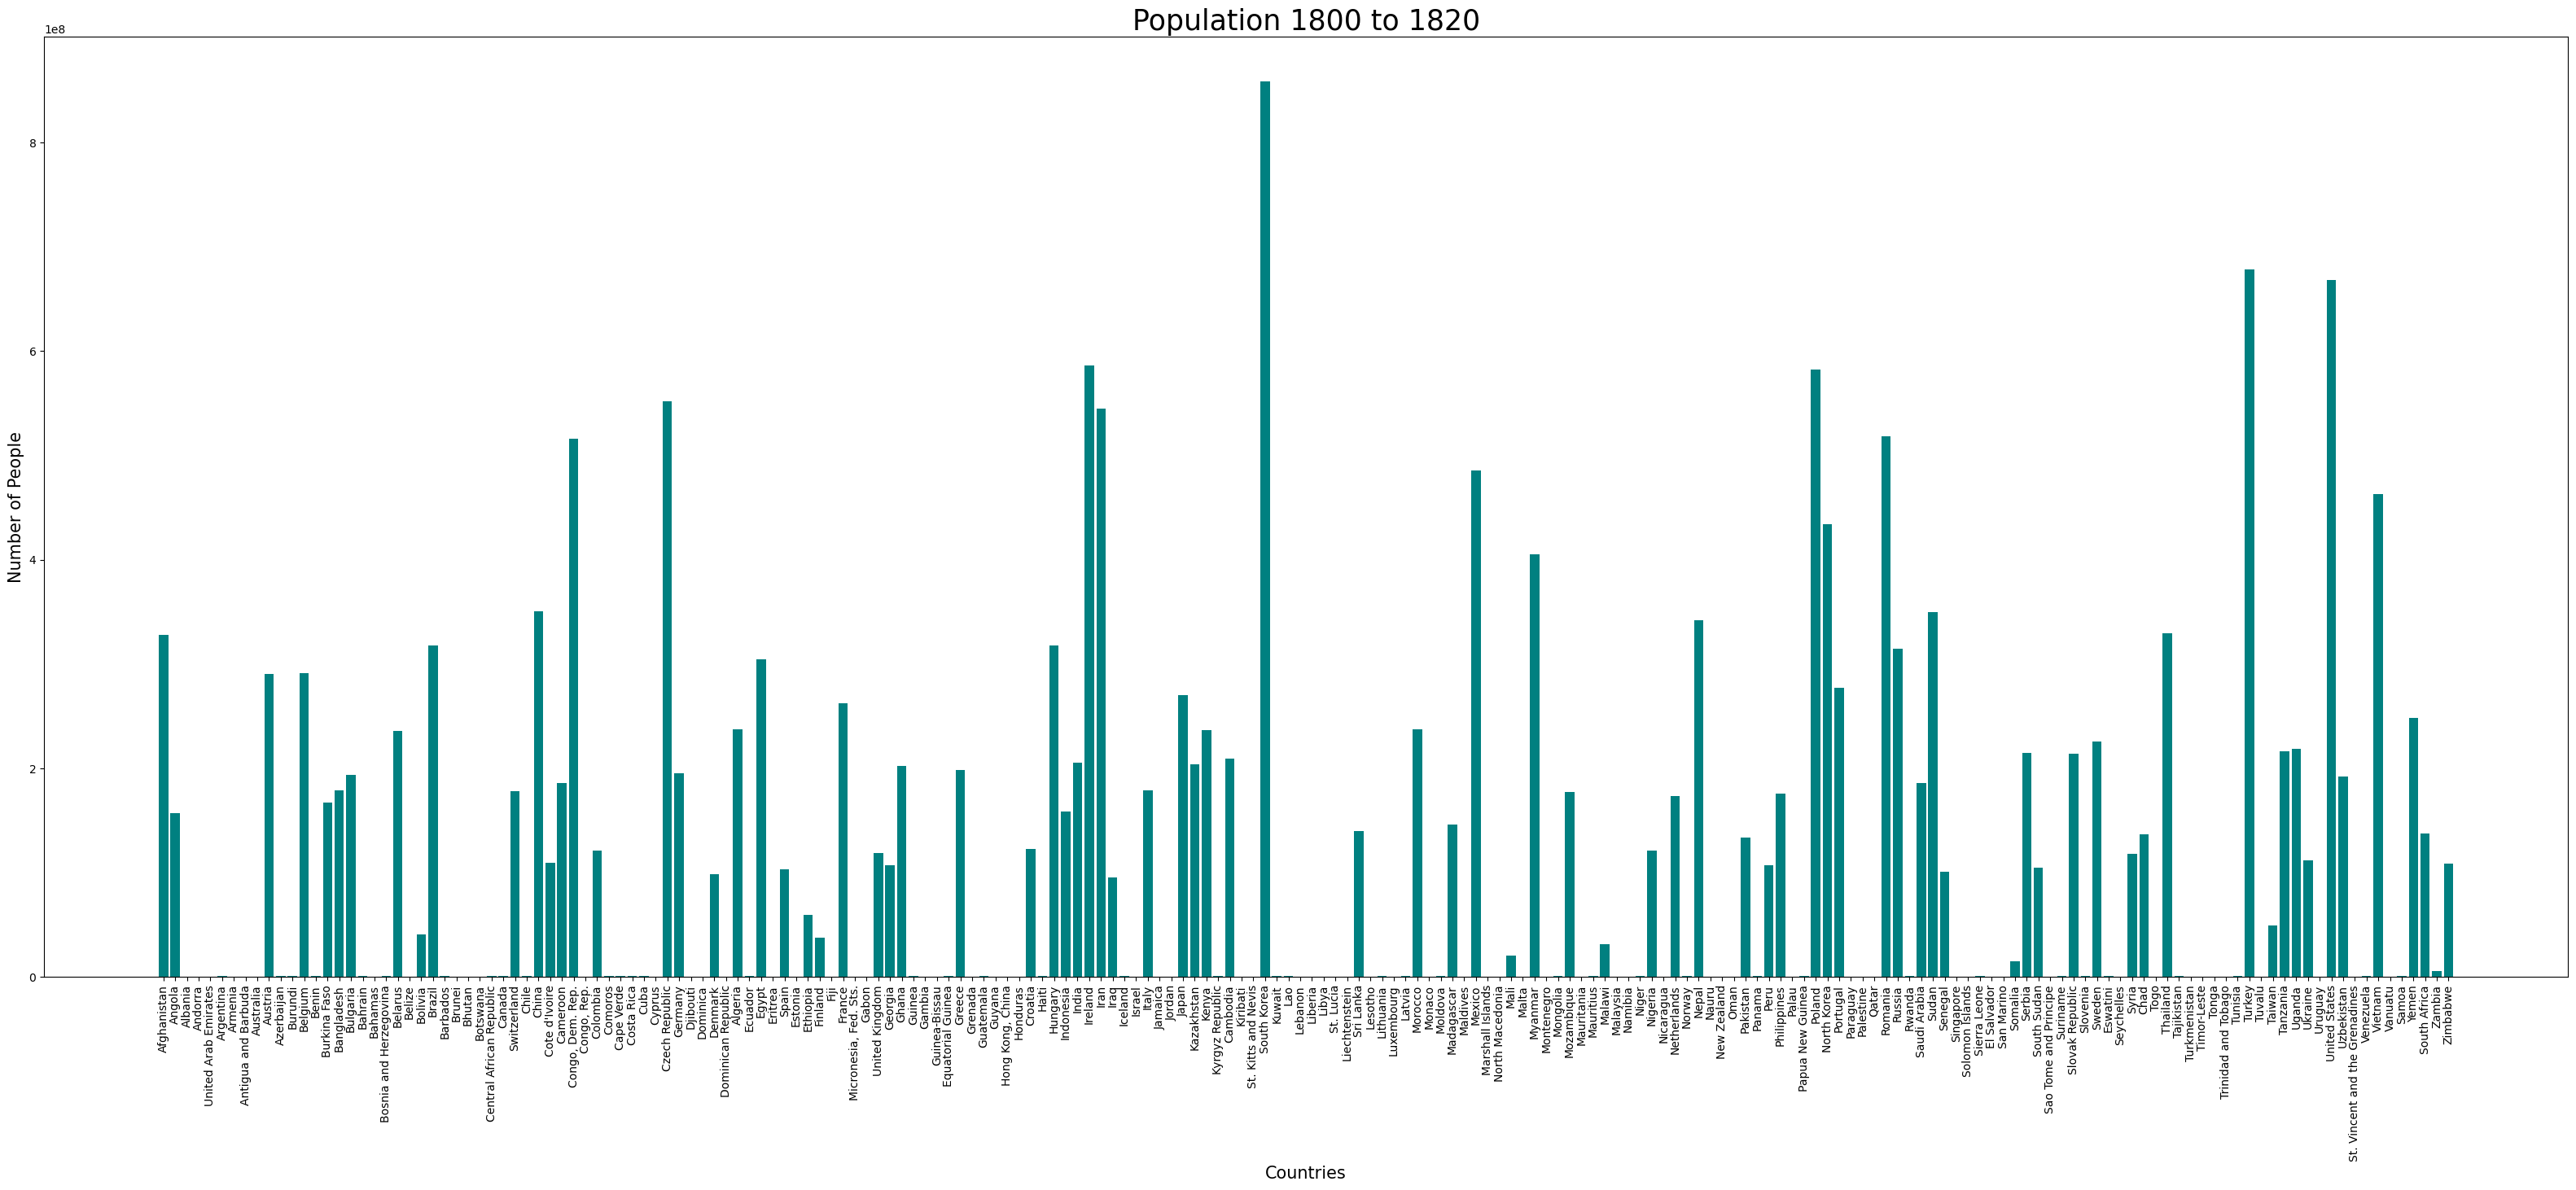

In [52]:
#Bar graph showing the population in each country
plt.figure(figsize = (40,15))
plt.bar(pop_new['country'], pop_new['mean_pop'], color = 'teal')
plt.title('Population 1800 to 1820', size= 25)
plt.xlabel('Countries',size = 15)
plt.ylabel("Number of People", size = 15)
plt.xticks(rotation=90);
# lesson 107 Viz

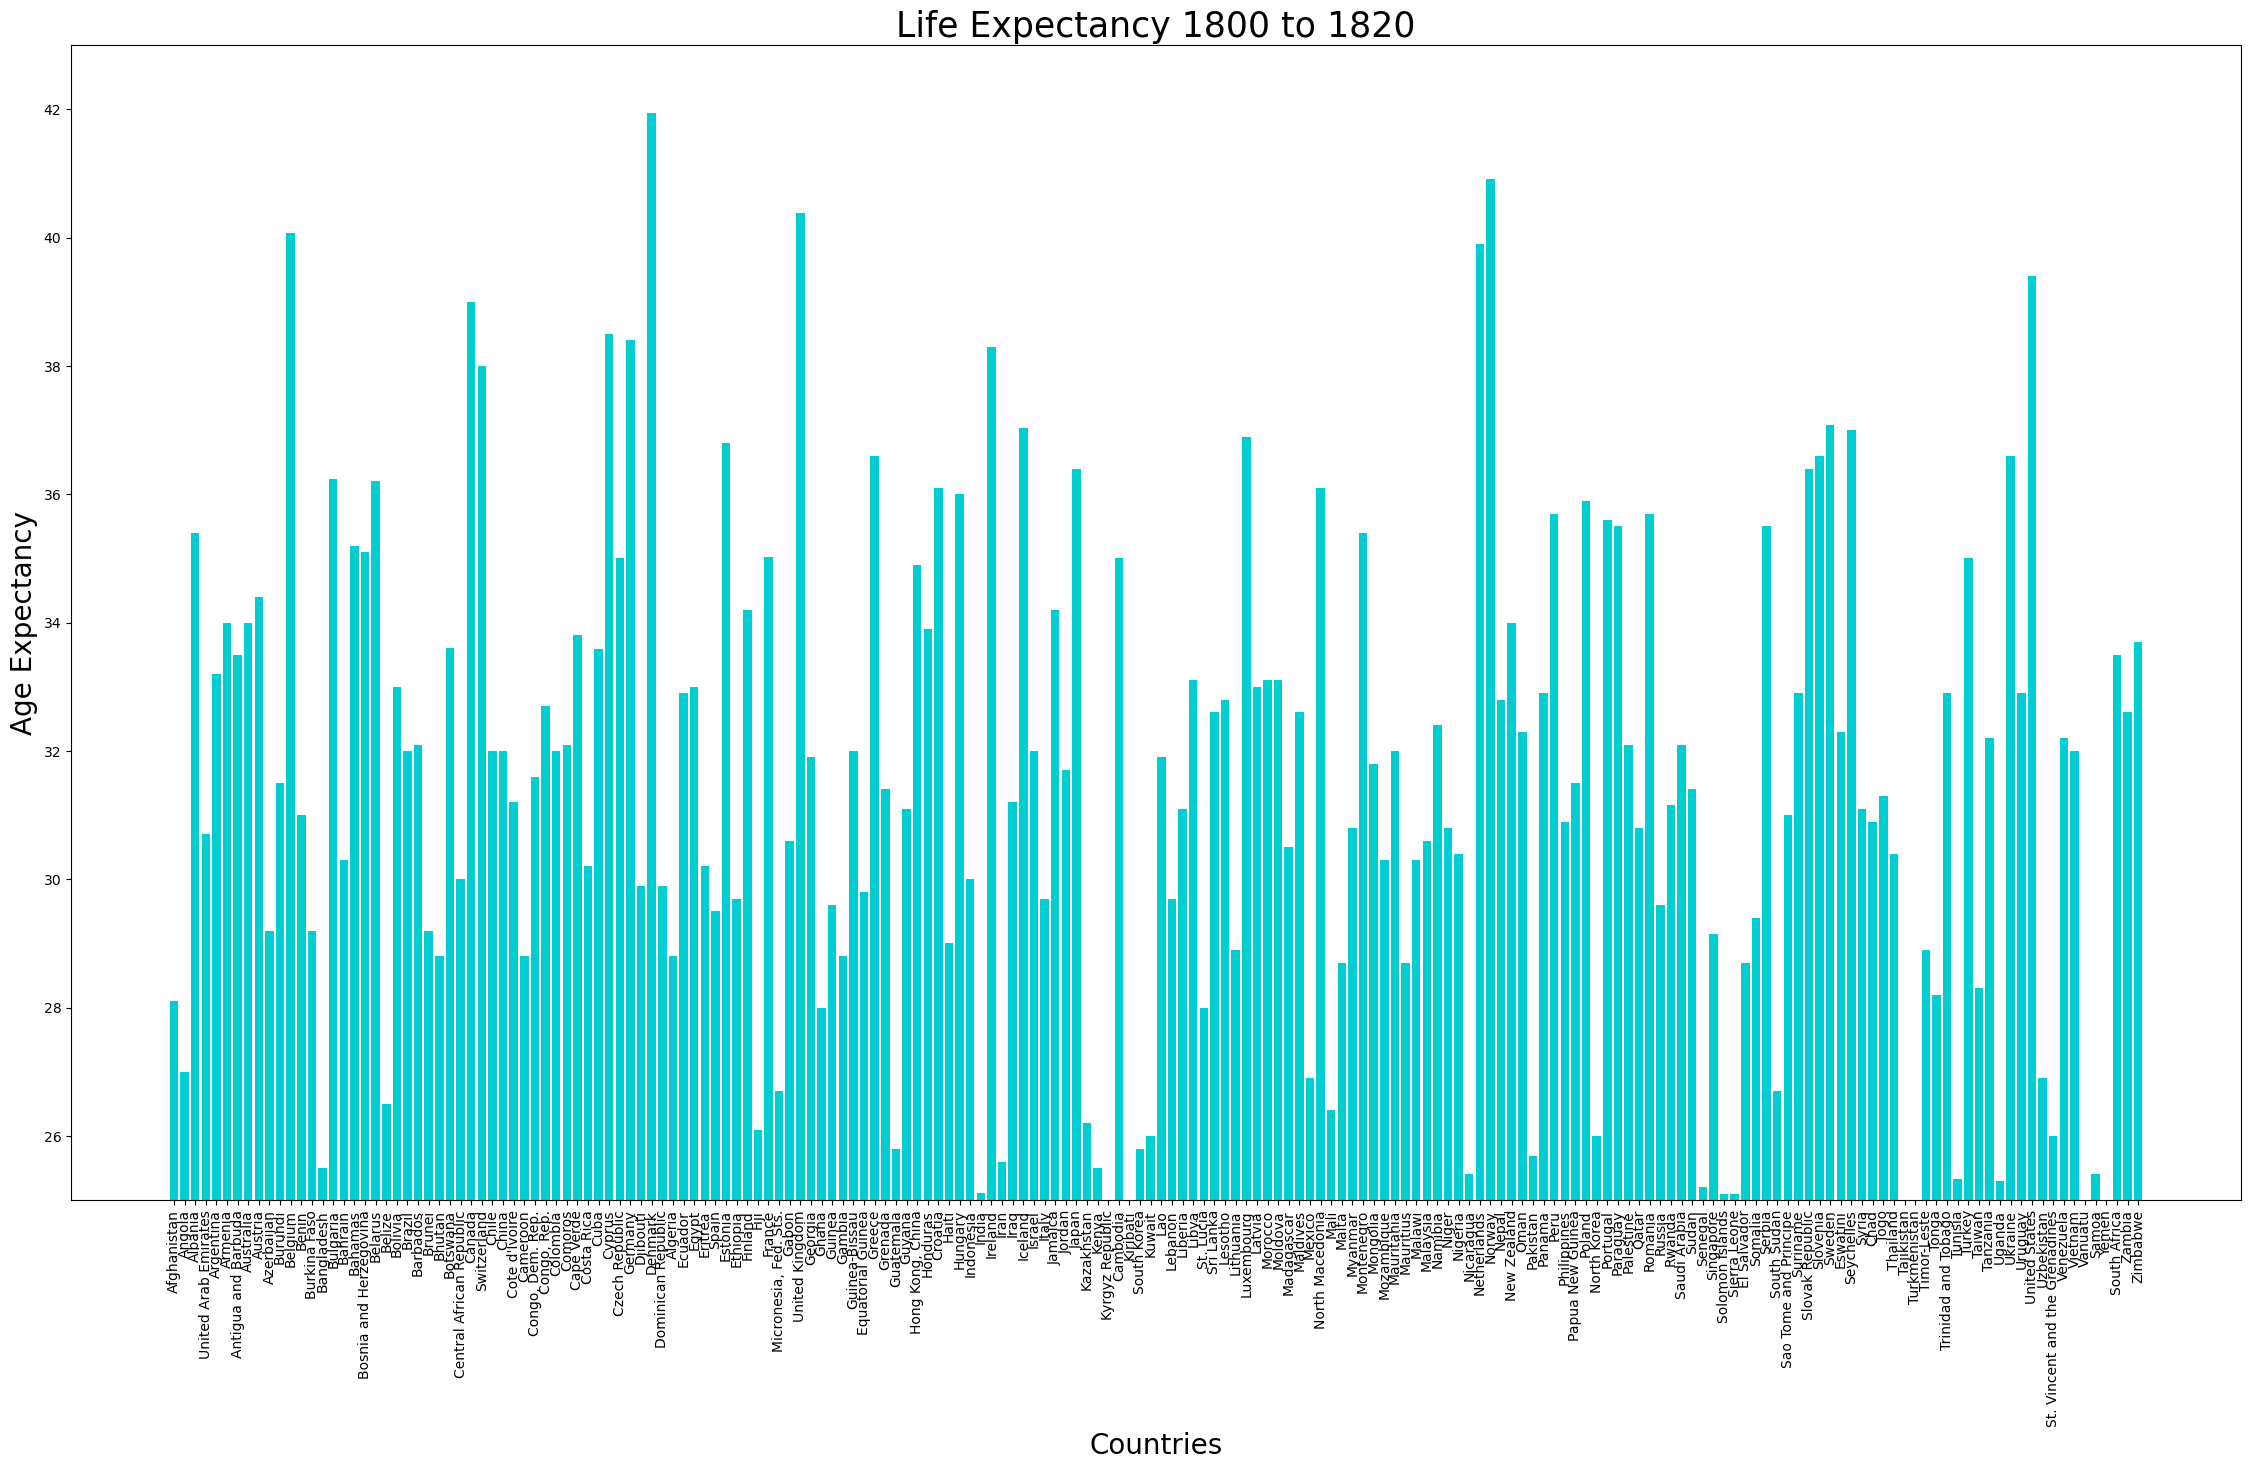

In [53]:
plt.figure(figsize = (28,15))
plt.bar(life_new['country'], life_new['mean_life'], color = 'darkturquoise')
plt.title('Life Expectancy 1800 to 1820', size= 25)
plt.xlabel('Countries',size = 20)
plt.ylabel("Age Expectancy", size = 20)
plt.xticks(rotation=90)
plt.ylim(25,43);

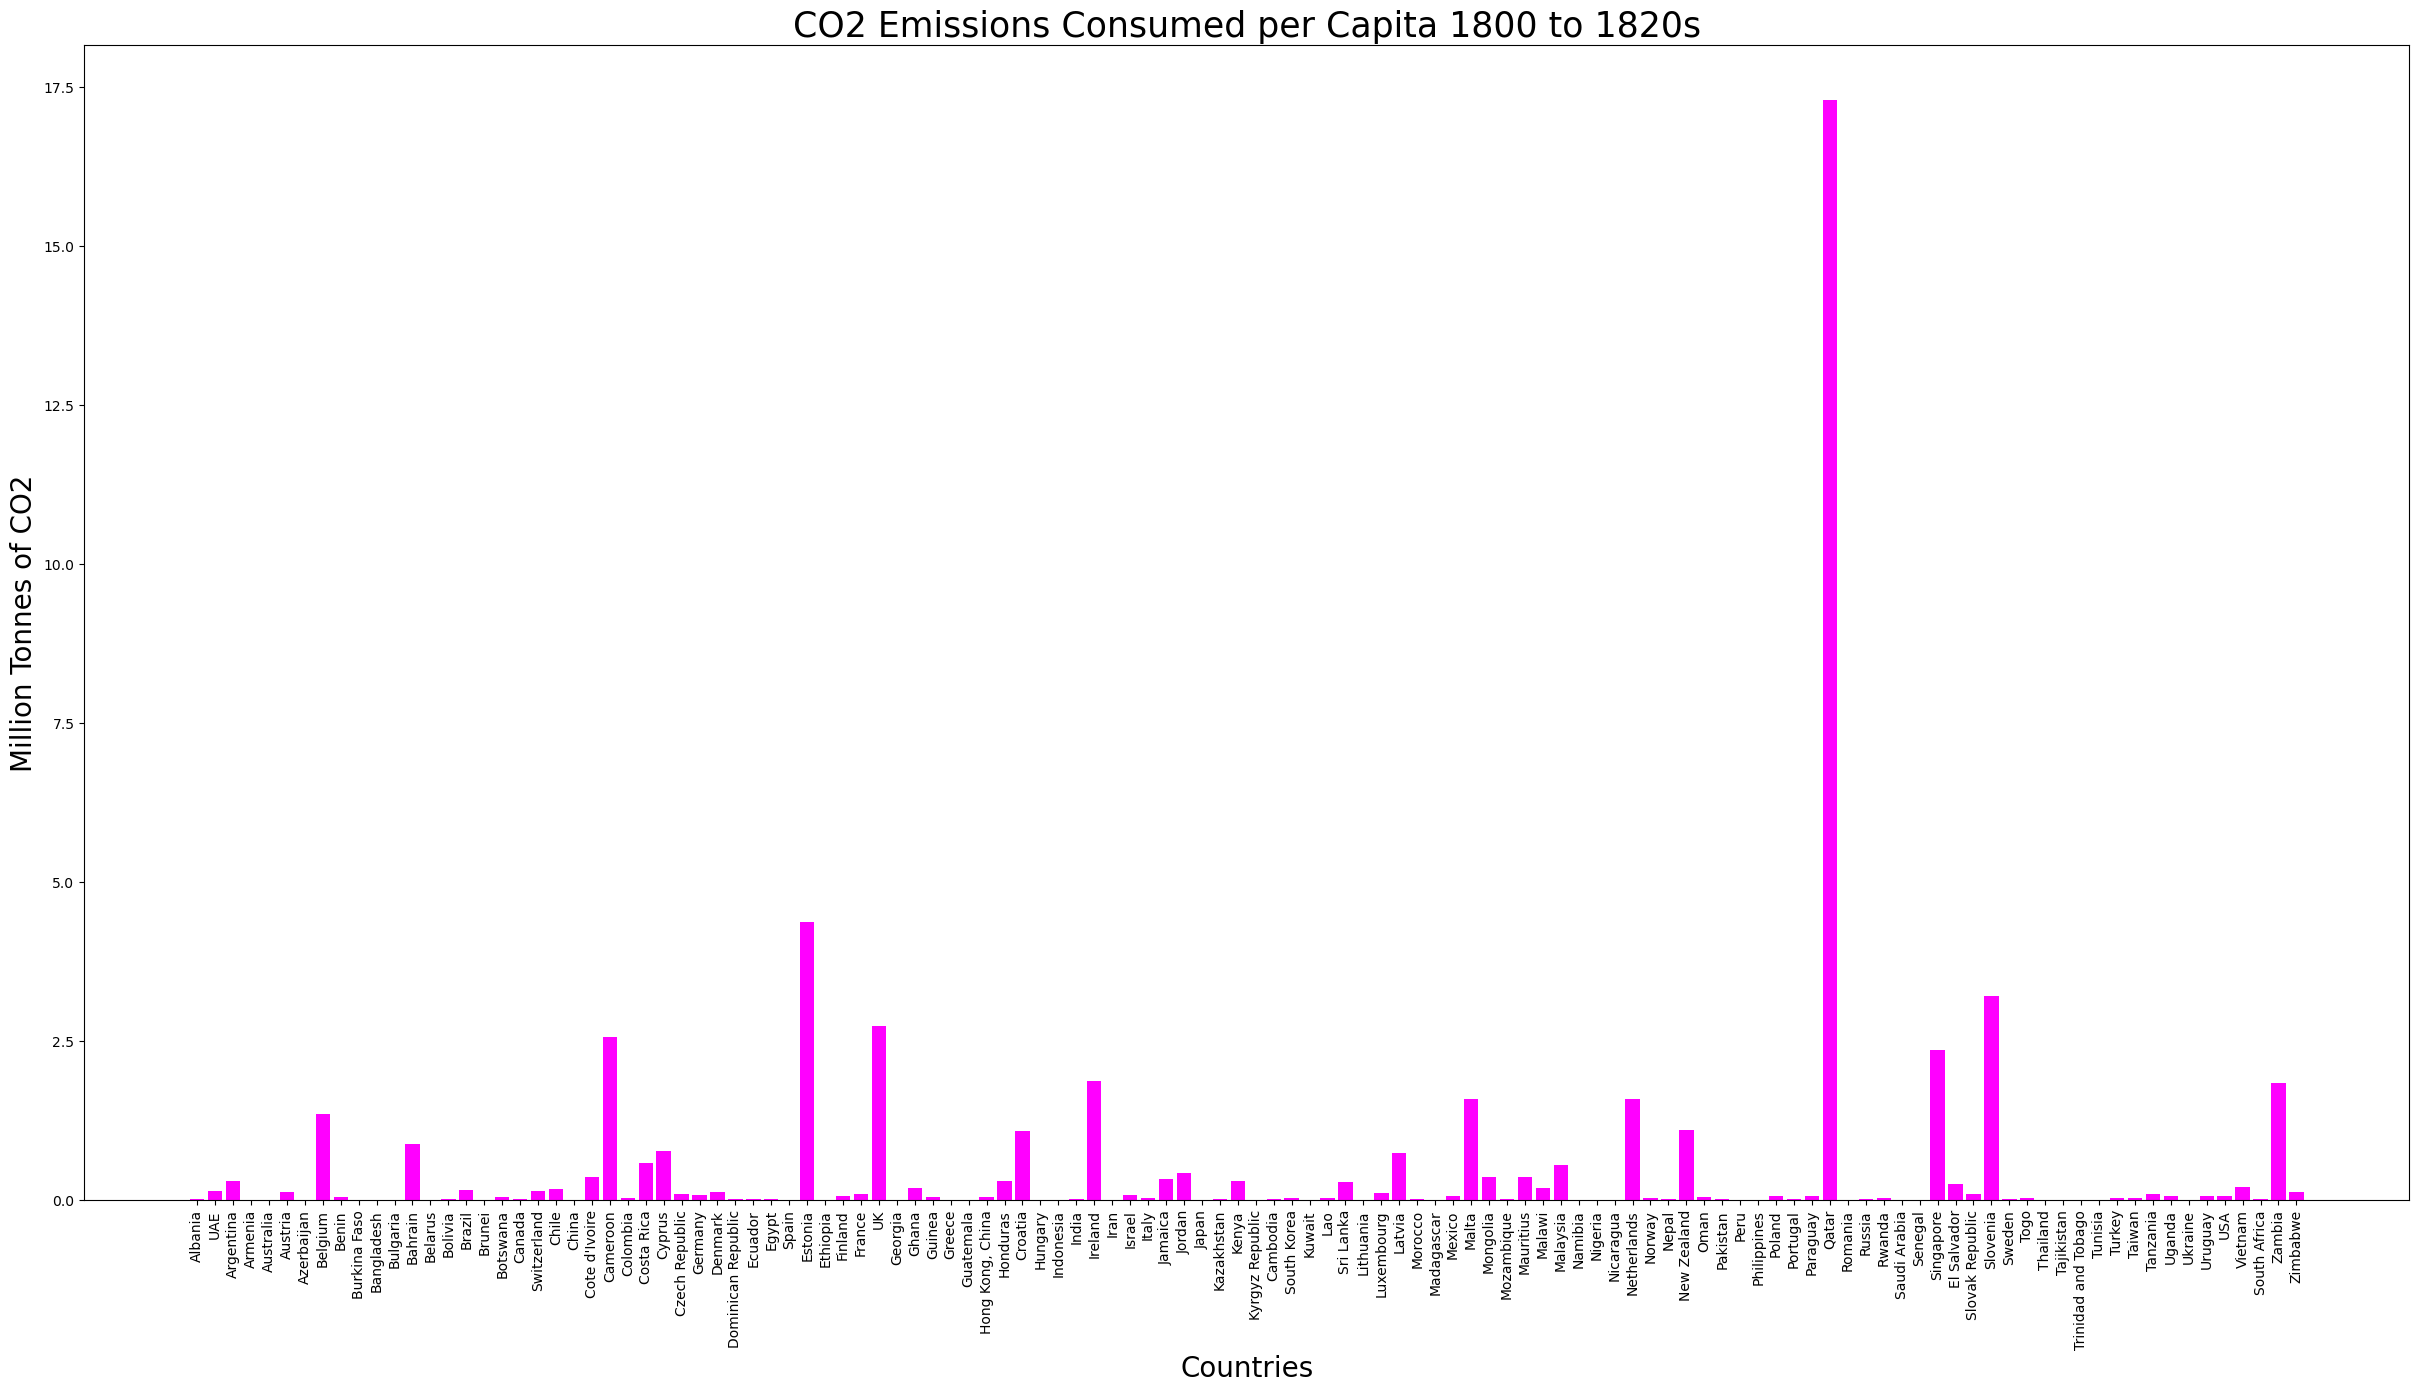

In [54]:
plt.figure(figsize = (30,15))
plt.bar(emissions_new['country'], emissions_new['mean_emissions'], color = 'magenta')
plt.title('CO2 Emissions Consumed per Capita 1800 to 1820s' , size= 25)
plt.xlabel('Countries',size = 20)
plt.ylabel("Million Tonnes of CO2", size = 20)
plt.xticks(rotation=90);

### Scatter Plots

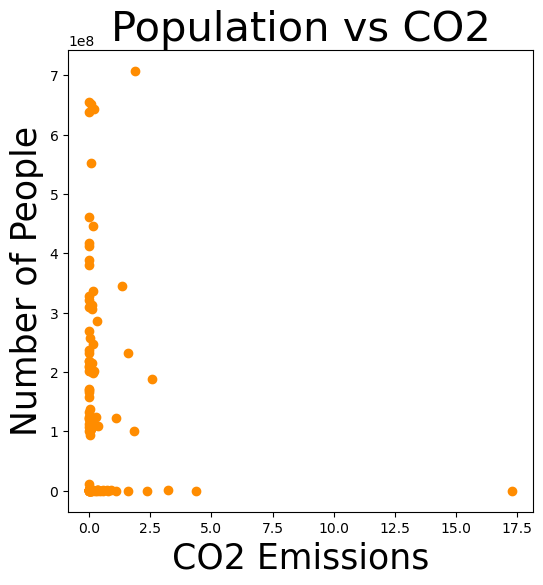

In [55]:
#scatter merged data to compare, find correlation if there is one
plt.figure(figsize = (6,6))
plt.scatter(emissions_pop['1820_pop'],emissions_pop['1820_emis'], color='darkorange')
plt.title('Population vs CO2', size = 30)
plt.xlabel('CO2 Emissions', size = 25)
plt.ylabel('Number of People', size = 25);
# lesson 107 Viz

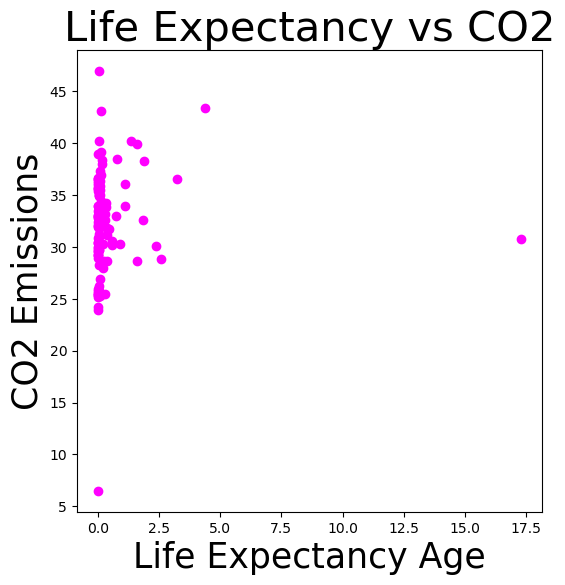

In [56]:
plt.figure(figsize = (6,6))
plt.scatter(emissions_life['1820_emis'], emissions_life['1820_life'], color='fuchsia')
plt.title('Life Expectancy vs CO2', size = 30)
plt.xlabel('Life Expectancy Age', size = 25)
plt.ylabel('CO2 Emissions', size = 25);

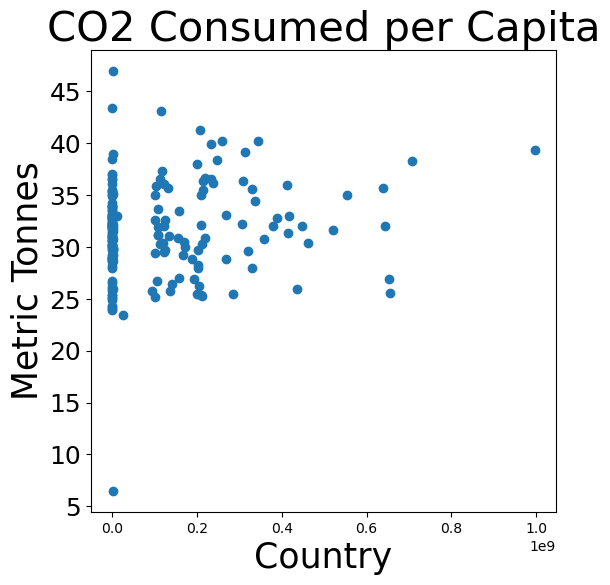

In [57]:
plt.figure(figsize = (6, 6))
plt.scatter(pop_life['1820_pop'],pop_life['1820_life'])
plt.title('CO2 Consumed per Capita', size = 30)
plt.xlabel('Country', size = 25)
plt.ylabel('Metric Tonnes', size = 25)
plt.yticks(size=18);

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Make sure to answer your question of interest or address your problem statement here.

If I was a researcher investigating the origins of carbon dioxide emissions and where the root of skin cancer may have evolved from, I would reccommend starting in Qatar. According to the data given, from 1800 to 1820 Qatar had the highest carbon dioxide emissions even though they are one the countries with the fewest population. Another interesting find is that the next two leading countries of carbon dioxide emissions were 10 to 12.5 milliion tonnes less than Qatar and the population of those countries were very similar. My reasoning behind this theory is I took the averages of each data frame by the column year and created a bar graph which included every country as the x axis and the y axis is the known variable. The data from Gapminder, being it was recorded in the 1800s, may need some refining for there were some missing data and some of the dataframes had big outliers.

Just to check if there was already a events happening, I put graphed a scatter plot to compare CO2 emissions with population, and CO2 emissions with life expectancy and there was no correlation. This means that the origin of skin cancer was most likely after the time frame of 1800 and 1820. So how could we find a timeframe of possibly when sin cancer became prevalent? A way to find out when skin cancer started is to broaden our time using the same functions and see when CO2 emissions begins to correlate with life expectancy. We could also then cross examine the data to see which countries in the respectable time frame had the most carbon dioxide emissions and that could be a prime location to investigate skin cancer origination.